#### AI
    - 머신러닝, 컴퓨터 비전(영상처리), 자연어 처리, 로봇 공학 등 그와 관련된 모든 주제를 포괄하는 개념
    
#### Machine Learning
    - 더 많은 데이터 축적을 통해 성능을 개선할 수 있도록 하는 다양한 알고리즘과 방법론
    
#### Deep Learning
    - 신경망(Neural Network)을 부르는 다른 이름
    - 여러 개의 히든 레이어를 통해 깊게 학습한다고 해서 붙여진 이름

---
#### Machine Learning과 Data Mining
    - 머신러닝은 훈련 데이터를 통해 학습된 알려진 속성을 기반으로 한 예측에 중점
    - 데이터 마이닝은 데이터의 미처 몰랐던 속성을 발견하는 것에 집중(이는 데이터 베이스의 지식 발견 부분의 분석 절차에 해당한다.)
    - 이들은 방법적으로 중복되는 부분이 있다. 데이터마이닝에서는 머신러닝은 필수가 아니지만 머신러닝에서는 데이터마이닝이 필수라는 부분이 다르다.

---
## 머신러닝의 종류

#### 1. 지도 학습(교사학습)
    - 회귀(Regression)
        + 선형 회귀
        
    - 분류(Classification)_ 이산적 데이터(Y or N)
        + 로지스틱 선형 회귀
        + KNN
        + Decision Tree
        + Random Forest
        + SVM
        + Naive Bayes
        + Neural Network

#### 2. 비지도 학습
    - 알고리즘이 어렵고, 엄청 많은 데이터가 필요. 그러나 현재 가장 각광받고 있는 분야
    
    - 군집(Clustering)
        + K-MEANS
        + DBSCAN
        
    - 차원축소
        + PCA

#### 3. 강화 학습(Reinforcement Learning) p.42
    - ex)알파고
    - 완전한 답을 제공하지 않는다.
    - 보상 시스템 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

In [2]:
#!pip install mglearn
import mglearn
# 단순 학습용 패키지. 주로 sklearn을 씀

### 샘플 소개

C:\Users\cecil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, '두번째 특성')

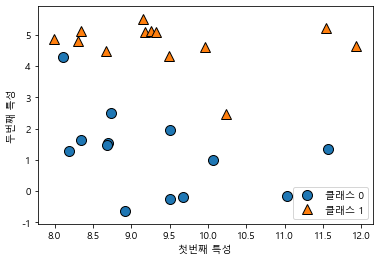

In [7]:
# 이진 분류 데이터셋
X, y = mglearn.datasets.make_forge()  # X는 입력(훈련/학습)데이터, y는 X에 대한 설명 혹은 답(레이블데이터)
#X # 2차원 배열/무의미한 무작위(난수) 학습데이터
y  

# 그래프(산포도) / maplotlib기반
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")

(-3.0, 3.0)

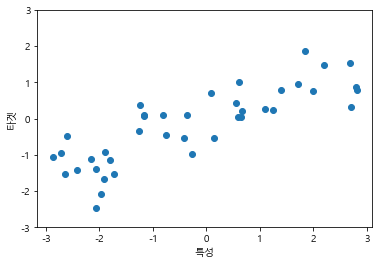

In [9]:
# 회귀 분석용 샘플
X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.xlabel("특성") # 컬럼
plt.ylabel("타겟") # 레이블
plt.ylim(-3, 3) # 범위

In [18]:
# sklearn 유방암 샘플
from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()
print(cancer.keys())
cancer.data
cancer.target
#print(cancer.DESCR)
type(cancer)
cancer.data.shape
## X = 'data', y = 'target'

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


(569, 30)

In [1]:
# 미국 보스턴 집값 데이터 샘플
from sklearn.datasets import load_boston

boston = load_boston()
boston.data.shape
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

---
p.58~60
#### 과대적합
    - 훈련 데이터셋의 각 샘플에 너무 가깝게 맞춰져 있어서 복잡한 모델을 만드는 것

#### 과소적합
    - 너무 간단한 모델이 선택되는 것

#### 일반화
    - 처음 보는 데이터에 대해서 정확하게 예측할 수 있는 것

---
## KNN (K - Nearest Neighbors)

#### 1) 특징
    - 이해하기 쉽고 직관적인 모델
    - 더 복잡한 알고리즘을 적용하기 전에 시도해 볼 수 있는 알고리즘
    - 훈련셋이 너무 크면 예측이 느려진다.
    
#### 2) 파라미터
    - 이웃의 갯수(K) :_하이퍼 파라미터(p.60)
    - 데이터 사이의 거리(distance)를 재는 방법 : L2 norm

C:\Users\cecil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


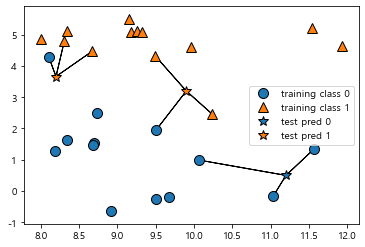

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
# 새로 입력한 데이터(별표)에서 가까운 데이터(3개)가 다수결로 했을때 가장 많은 데이터의 특성을 따라감.
# 이웃의 갯수에 따라 결과값이 달라질 수 있음
# 설정할 이웃의 갯수는 가급적이면 홀수로 지정(성능낭비 방지차원)

---
### L1 norm, L2 norm

- L1 norm
    - 단순한 거리의 절대값의 합
    - 맨하탄 거리
    
- L2 norm
    - 거리의 절대값의 합에 루트 적용
    - 피타고라스의 정리, 유클리드 거리

In [33]:
# 데이터 포인트의 최단 거리 : L2 norm 으로 계산 _ 1:1:루트2
df = pd.DataFrame(np.random.randint(low=1, high=10, size=(3,2)))
df.columns=["x", "y"]
df

,x,y
0,1,3
1,3,3
2,3,8


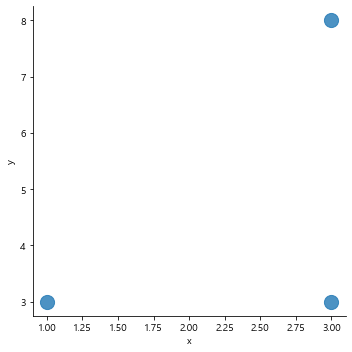

In [34]:
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s":200})

In [35]:
from numpy import linalg

dt_point = df.values
dt_point

# (0,0)으로 부터 어디가 제일 가까울까? / L2 norm으로 계산
linalg.norm(dt_point, ord=2, axis=1)

array([3.16227766, 4.24264069, 8.54400375])

In [38]:
# L1 norm으로 계산
# 3명이 주사위를 3번 던진 후 걸음 수를 측정한다.

df = pd.DataFrame(np.random.randint(low=-3, high=3, size=(3,3)))
df.columns = ["move_1", "move_2", "move_3"]
print(df)

# 누가 가장 많이 걸었을까?
walk = df.values
linalg.norm(walk, ord=1, axis=1)

   move_1  move_2  move_3
0      -1      -3       2
1       1       0       0
2       1       2       0


array([6., 1., 3.])

### KNN 구현

In [3]:
# 데이터 준비(학습용-테스트용 구분)
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #random_state=0 :난수 보정
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19, 2) (7, 2) (19,) (7,)


C:\Users\cecil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
# 학습(훈련)용 데이터 적용
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
?KNeighborsClassifier

In [47]:
# 훈련받은 데이터는 의미 없음
clf.predict(X_train)

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [48]:
y_train

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

---

In [5]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [6]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

---

In [7]:
# 결과값 테스트 : 정확도 점수화
clf.score(X_test, y_test)

0.8571428571428571

### KNN 분석

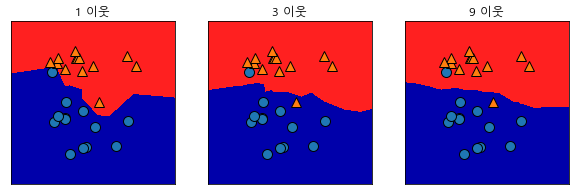

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))  # 1행3열 그래프
#axes

for n_neigh, ax in zip([1, 3, 9], axes):
    #print(n_neigh)
    #print(ax)
    clf = KNeighborsClassifier(n_neighbors=n_neigh).fit(X, y)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax) #경계선
    
    ax.set_title("{} 이웃".format(n_neigh))  #타이틀

In [35]:
# 샘플 데이터 예제
from sklearn.datasets import load_breast_cancer 

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


In [31]:
# 훈련
#clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [21]:
# 훈련한 결과값 확인
clf.score(X_train, y_train) 

0.9413145539906104

In [22]:
# 테스트한 결과값 확인
clf.score(X_test, y_test)  # 과대적합 확인

0.9370629370629371

In [36]:
# 반복문_ 최적의 이웃 갯수 찾기
train_acc = []
test_acc = []

for n_neigh in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neigh).fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

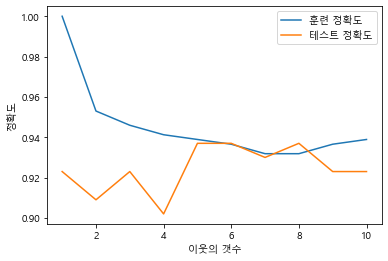

In [37]:
# 그래프
plt.plot(range(1, 11), train_acc, label="훈련 정확도")
plt.plot(range(1, 11), test_acc, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("이웃의 갯수")
plt.legend()

In [38]:
test_acc[6]

0.9300699300699301

### 회귀분석을 위한 KNN

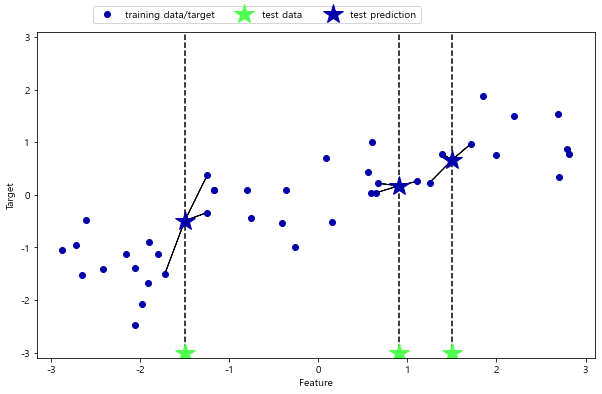

In [41]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [43]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape)

(30, 1) (10, 1)


In [44]:
?train_test_split

In [68]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [69]:
print("설명 계수(R^2) : ", reg.score(X_test, y_test))

설명 계수(R^2) :  0.8344172446249605


In [60]:
X_test

array([[-1.24713211],
       [ 0.67111737],
       [ 1.71105577],
       [-2.06388816],
       [-2.87649303],
       [-1.89957294],
       [ 0.55448741],
       [ 2.81945911],
       [-0.40832989],
       [-2.72129752]])

In [61]:
# 프로그램을 만든다고 가정
#reg.predict([[-1.24713211]])
reg.predict(X_test)

array([-0.3409073 ,  0.03527881,  1.87664889, -2.47196233, -1.52730805,
       -1.67303415,  0.03497884,  0.86893293,  0.09398858, -1.52730805])

In [62]:
# 정답
y_test[0]
y_test

array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
       -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133])

#### KNeighborsRegressor 분석

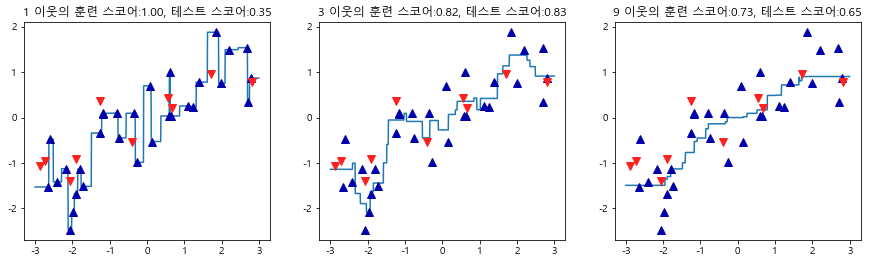

In [74]:
# 이웃의 갯수에 대해 그래프 3개를 작성
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# x축 눈금
line = np.linspace(-3, 3, 1000).reshape(-1, 1) # -3에서 3까지 1000개, 2차원배열

# 반복문
for n_neigh, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neigh).fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line)) #경계선
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8) # 훈련용 데이터(X,y), "^"모양,c색,크기8
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{0} 이웃의 훈련 스코어:{1:.2f}, 테스트 스코어:{2:.2f}".format(n_neigh, 
                                                                 reg.score(X_train, y_train),
                                                                reg.score(X_test, y_test)))

### iris를 이용한 사례

In [90]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris.target_names)
print(iris.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [92]:
# 데이터 훈련용, 테스트용으로 나누기
X_train, X_test, y_train, y_test = train_test_split(iris["data"], iris.target, random_state=0)
print(X_train.shape, X_test.shape)

(112, 4) (38, 4)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000209E0520130>,
      dtype=object)

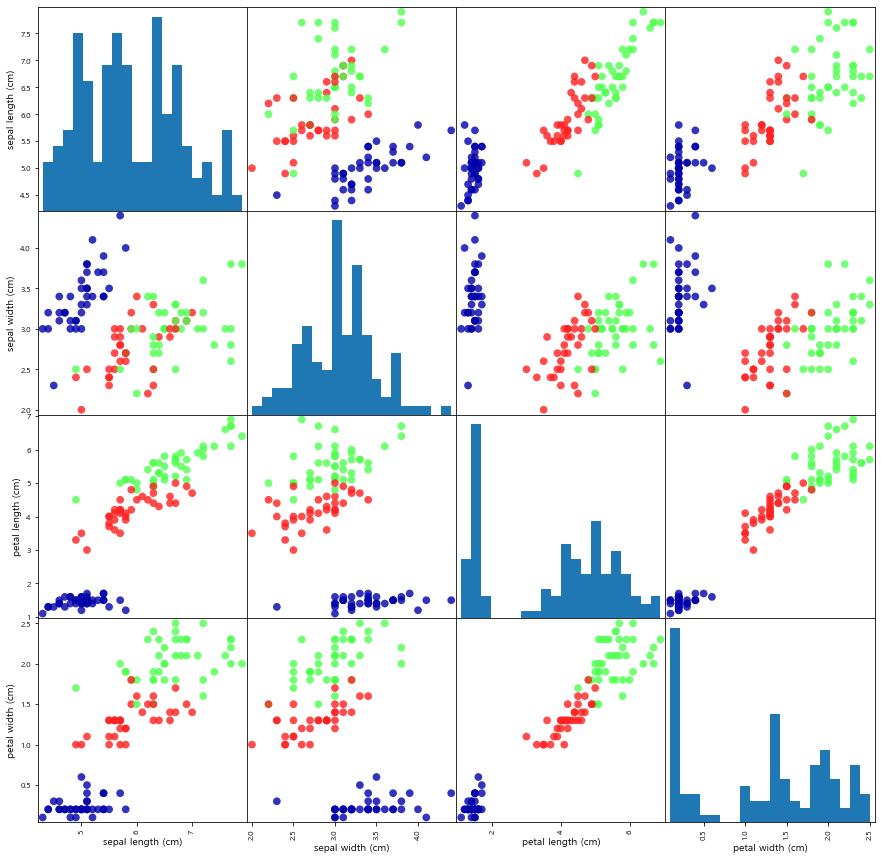

In [99]:
# 데이터 분석
iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df

pd.plotting.scatter_matrix(iris_df, figsize=(15, 15), marker="o", s=60, cmap=mglearn.cm3, c=y_train,
                          alpha=.8, hist_kwds={"bins":20})  
# alpha= : 투명도
# hist_kwds(): 히스토그램 갯수 늘리기

In [100]:
# 데이터 학습
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

#knn = KNeighborsClassifier(n_neighbors=3)
#knn.fit(X_train, y_train)

In [109]:
# 점수 확인1
print(knn.score(X_test, y_test))

#점수확인2
pred = knn.predict(X_test)
print(np.mean(pred== y_test))

0.9736842105263158
0.9736842105263158


In [111]:
# 꽃받침(Sepal)의 길이가 5cm, 폭은 2.9cm, 꽃잎(Petal)의 길이 1cm, 폭은 0.2cm
s_h = 5
s_w = 2.0
p_h = 1.0
p_w = 0.2

# 새로운 입력값(X_new)에 2원 배열로 묶어주기
X_new = np.array([[s_h, s_w, p_h, p_w]])
pred = knn.predict(X_new)
print("붓꽃의 품종은?", iris.target_names[pred])

붓꽃의 품종은? ['setosa']


#### 영화 분류 프로그램 만들기

In [171]:
import operator

def createDataSet():
    group = np.array([[1.0, 2.0], [1.0, 4.0], [4.0, 1.0], [4.0, 2.0]])
    label = ["Action", "Action", "Romance", "Romance"]
    return group, label

def calcDistance(X_new, data):
    # 데이터의 갯수
    #print(data)
    dataSize = len(data)
    #print(data.shape)
    #print(data.shape[0])
    
    # 입력 데이터와 기존 데이터의 차이
    diffMat = np.tile(X_new, (dataSize, 1)) - data
    print(diffMat)
    
    # L2 norm
    sqDiffMat = diffMat**2
    sqDistance = sqDiffMat.sum(axis=1)
    distance = sqDistance**0.5
    print(distance)
    
    return distance.argsort()

def findMajorityClass(target, k, sortedDistance):
    classCount = {}
    
    for i in range(k):
        voteLabel = target[sortedDistance[i]]
        #print(voteLabel)
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
        #print(classCount, items())
        
    #print(classCount)
    # dict를 튜플로 변환()
    #print(sorted(classCount.items(), key=operator.itemgetter(1), reverse=True))
    return sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)

def classify(X_new, data, target, k):
    sortedDistance = calcDistance(X_new, data)
    #print(sortedDistance)
    sortedDistanceCount = findMajorityClass(target, k, sortedDistance) #(X_new, ...)제외 
    
    return sortedDistanceCount

In [173]:
# 데이터 생성
X, y = createDataSet()

# 훈련
result = classify([2.0, 3.0], X, y, 3)
print("결과는 {} 영화다.".format(result[0][0])) # 답은 Action

[[ 1.  1.]
 [ 1. -1.]
 [-2.  2.]
 [-2.  1.]]
[1.41421356 1.41421356 2.82842712 2.23606798]
결과는 Action 영화다.


In [143]:
# np.tile(X_new, (dataSize, 1))
np.tile([2.0, 3.0], (4, 1))

# tile() 예시
A = 1
B = np.array([0,1])
C = np.array([[0, 1], [2, 3]])

np.tile(A, 3)  # 해당값을 하나씩만 3번 반복
np.tile(B, 3)  # 같은 1차원 배열로 3번 반복
np.tile(C, 3)  # 같은 2차원 배열로 3번 반복

np.tile(A, (2, 3)) # A라는 스칼라 값을 (2,3)만큼 반복
np.tile(B, (2, 3)) # 차원의 증가 없이 반복
np.tile(C, (2, 3))

array([[0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3],
       [0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3]])